The raw data of dwelling lifetime is not cleaned even though it also contain year 2051-2100.
The standard deviation for 1600-1799 is modelled with regression and merged into the data.
The same is done for average lifetime. The trend was linear for the raw data and therefore linear regression was chosen.

The linear relationship can be expressed with this function (from warm_up_15):

\begin{equation}
    \textbf{Y} = \beta \textbf{X}+ \epsilon
\end{equation}

To do the regression B must be found.

In [39]:
# All imports
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy.stats import norm #for normal distribution
#import statsmodels.api as sm #for linear regression
import matplotlib.pyplot as plt
import math as ma

import os
from pathlib import Path
import copy
import matplotlib.pyplot as plt
from datetime import datetime
import sys
from scipy.optimize import curve_fit

In [40]:
#* Define paths
directory_path = Path('../../../')

In [41]:
raw_data = pd.read_excel(
    directory_path / 'data' / 'raw_data' / 'Dwelling_Lifetime' / 'lifetime_raw_data_new.xlsx',
    header=0)

new_header = ['year', 'lifetime', 'sigma'] # Assigning new names to the header
raw_data.columns = new_header

# Remove the last 50 rows (years 2051-2100)
raw_data = raw_data.iloc[:-50]

# defining the parameters as np.arrays
year = np.array(raw_data.year)
lifetime = np.array(raw_data.lifetime)
sigma = np.array(raw_data.sigma)

# Display the DataFrame with updated column names
raw_data.tail()

,year,lifetime,sigma
246,2046,96,0.201818
247,2047,96,0.201818
248,2048,96,0.201818
249,2049,96,0.201818
250,2050,96,0.201818


In [42]:
#Calculate standard devision column by multiplying mean lifetime with sigma:
raw_data['std_dev'] = raw_data['lifetime'] * raw_data['sigma']
std_dev = raw_data['std_dev']

# Remove the 'sigma' column
raw_data = raw_data.drop('sigma', axis=1)

raw_data.head()

,year,lifetime,std_dev
0,1800,150,45.0
1,1801,150,45.0
2,1802,150,45.0
3,1803,150,45.0
4,1804,150,45.0


In [43]:
# Save the cleaned dataframe to a new Excel file
raw_data.to_excel(directory_path / 
                 'Data/cleaned_and_combined_data/Dwelling_Lifetime/Cleaned_Dwelling_Lifetime.xlsx')

In [44]:
'''#Plot of the raw data for standard deviation without regression
plt.figure(figsize=(16,10))
plt.plot(year, std_dev, color = 'black', markersize = 5, label = f'Raw data for standard deviation')
plt.xlabel('Year')
plt.ylabel('Standard deviation')
plt.title('Raw data Standard deviation - visualization')
plt.legend(loc = 'best')
plt.show()'''

"#Plot of the raw data for standard deviation without regression\nplt.figure(figsize=(16,10))\nplt.plot(year, std_dev, color = 'black', markersize = 5, label = f'Raw data for standard deviation')\nplt.xlabel('Year')\nplt.ylabel('Standard deviation')\nplt.title('Raw data Standard deviation - visualization')\nplt.legend(loc = 'best')\nplt.show()"

In [45]:
# defining the parameters as np.arrays (one more time)
year = np.array(raw_data.year)
lifetime = np.array(raw_data.lifetime)
std_dev = np.array(raw_data.std_dev)

Regression for standard deviation 1600-2050 (natural cubic spline):

In [46]:
#* Import the code needed
import os
import pandas as pd
from pathlib import Path
import numpy as np
import copy
import matplotlib.pyplot as plt
from datetime import datetime
import sys
from scipy.optimize import curve_fit

In [47]:
#* Define paths
directory_path = Path('../../')

In [48]:
# getting the name of the directory where the this file is present.
current = os.path.dirname(os.path.realpath('this'))
 
# Getting the parent directory name where the current directory is present.
parent = os.path.dirname(current)
#make the UA path
module_path = parent + '/modules'
#append path to options to import from
sys.path.append(module_path)

import natural_cubic_spline_stack_overflow as ncs
import logistic_curve_function as logistic

ModuleNotFoundError: No module named 'natural_cubic_spline_stack_overflow'

NameError: name 'ncs' is not defined

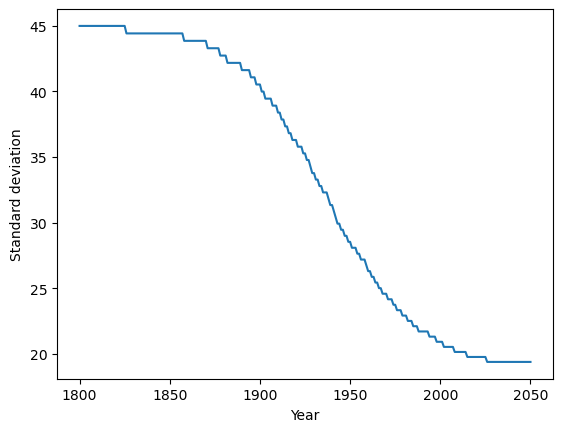

In [ ]:
#add plot and labels here
plt.plot(year,std_dev)
plt.xlabel('Year')
plt.ylabel('Standard deviation')

#-------------------------------------------------------
#Natural cubic spline regression:
inputs_ncs = year
outputs_ncs = std_dev
std_dev_cub = outputs_ncs
pred_inputs = year

# we can either choose the knots manually, or supply a number of knots
# - see second graphic on top.
# knots at the 2nd and 2nd to last points, and at 20%, 40%, 60% and 80%
knots = [inputs_ncs[1], inputs_ncs[int(0.2*len(inputs_ncs))],inputs_ncs[int(0.4*len(inputs_ncs))],
        inputs_ncs[int(0.6*len(inputs_ncs))], inputs_ncs[int(0.8*len(inputs_ncs))], inputs_ncs[-2]]


# just for showing the different cubic fits
sections = []
for i, knot in enumerate(knots[1:]):
    index_first = np.where(inputs_ncs == knots[i])[0][0]
    index_second = np.where(inputs_ncs == knot)[0][0]
    section_years = inputs_ncs[index_first:index_second]
    section_values = outputs_ncs[index_first:index_second]
    sections.append([section_years, section_values])

#Define a path to the get_natural_cubic_spline_model

# setting up the actual model (training)
ncs_model = ncs.get_natural_cubic_spline_model(inputs_ncs, outputs_ncs, minval=min(inputs_ncs), 
                                               maxval=max(inputs_ncs), knots = knots)
# predicting of the single curve by the model
pred_outputs_cub_p = ncs_model.predict(pred_inputs)
print(f'The ncs_model')

#plot the knots:
for knot in knots:
    plt.plot([knot, knot], [min(pred_outputs_cub_p), max(pred_outputs_cub_p)], lw = 0.5, color = 'darkgreen', 
             alpha = 0.4)

for section in sections:
    [x,y] = section
    polynomial = np.poly1d(np.polyfit(x, y, 3))
    pol_outputs = polynomial(x)
    plt.plot(x, pol_outputs, '--', color = 'blue', lw = 1.5, label = 'sectional cubic fit')

plt.plot(year, std_dev, 's', color = 'black', markersize = 2, 
         label = f'original values')
plt.plot(pred_inputs, pred_outputs_cub_p, color = 'crimson', lw = 3, alpha = 0.8,
         label = 'ncs regression values')
plt.legend(loc = 'best')
#ticks = np.rint(oj_years[:int(len(oj_years)*perc_ncs/100*1.5):int(len(reg_predictor_years)/10)])
#plt.xticks(ticks = ticks)


#-------------------------------------------------------

# Add the years 1600-1799 and the regression values
reg_years = np.arange(1600, 1800)
ncs_reg_std_dev = ncs_model.predict(reg_years, pred_inputs)


# Plot linear regression for the extended range on the same plot
plt.plot(reg_years, ncs_reg_std_dev, '--', lw=7, alpha=0.5, color='green', label='ncs regression (extended)')
plt.legend(loc='best')

#-------------------------------------------------------

plt.title('Natural cubic spline regression standard deviation data set')
plt.show()

Lifetime:

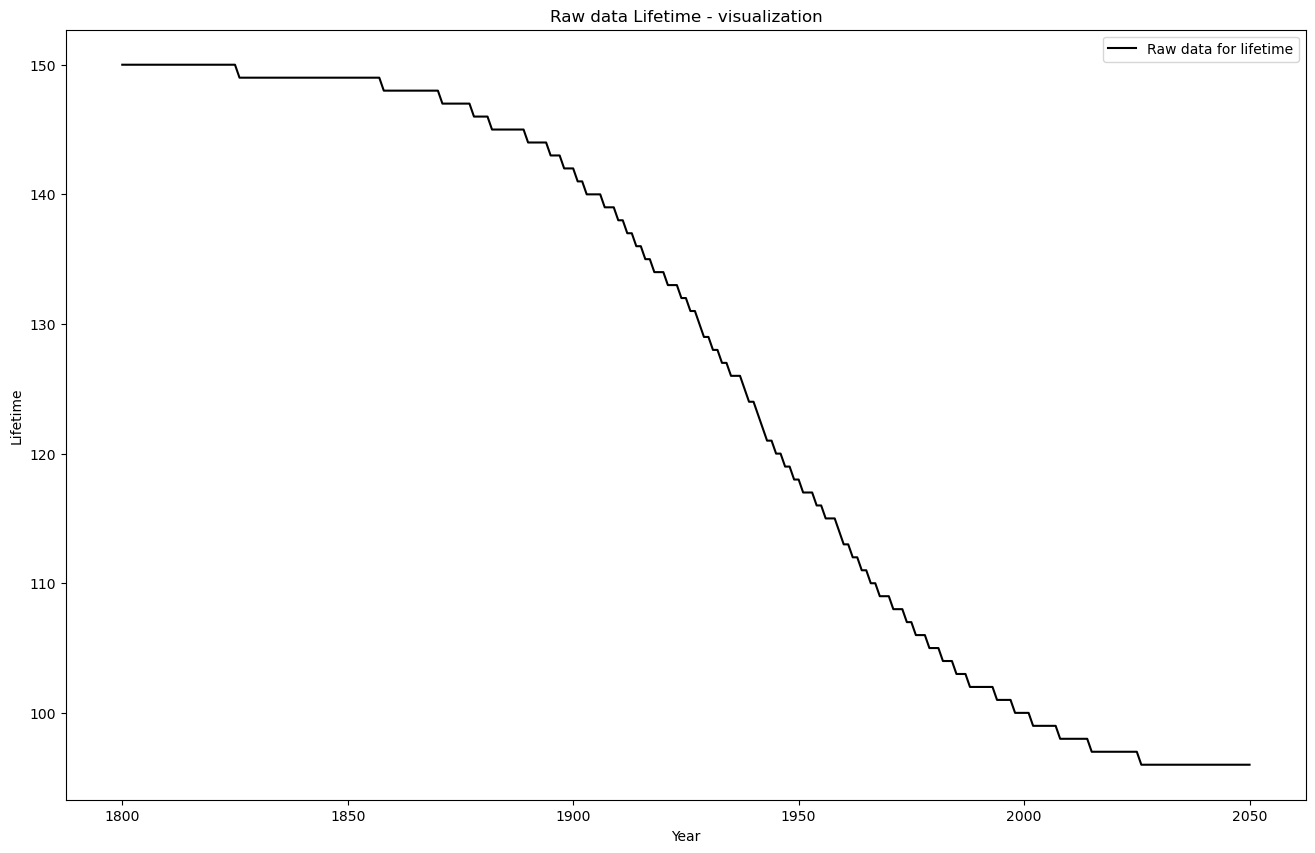

In [ ]:
#Plot of the raw data for lifetime without regression
plt.figure(figsize=(16,10))
plt.plot(year, lifetime, color = 'black', markersize = 5, label = f'Raw data for lifetime')
plt.xlabel('Year')
plt.ylabel('Lifetime')
plt.title('Raw data Lifetime - visualization')
plt.legend(loc = 'best')
plt.show()

Regression for lifetime 1600-2050 (natural cubic spline):

NameError: name 'ncs' is not defined

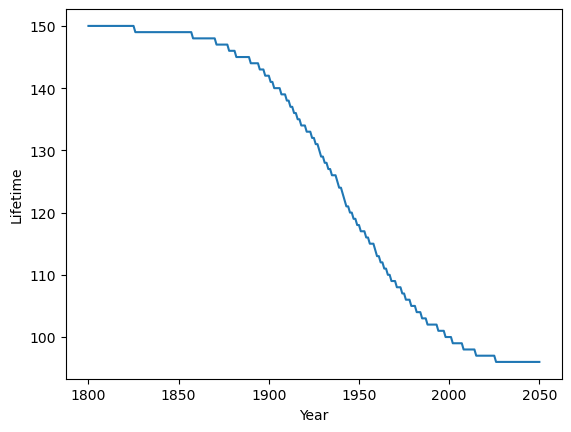

In [ ]:
#add plot and labels here
plt.plot(year,lifetime)
plt.xlabel('Year')
plt.ylabel('Lifetime')

#-------------------------------------------------------
#Natural cubic spline regression:
inputs_ncs = year
outputs_ncs = lifetime
lifetime_cub = outputs_ncs
pred_inputs = year

# we can either choose the knots manually, or supply a number of knots
# - see second graphic on top.
# knots at the 2nd and 2nd to last points, and at 20%, 40%, 60% and 80%
knots = [inputs_ncs[1], inputs_ncs[int(0.2*len(inputs_ncs))],inputs_ncs[int(0.4*len(inputs_ncs))],
        inputs_ncs[int(0.6*len(inputs_ncs))], inputs_ncs[int(0.8*len(inputs_ncs))], inputs_ncs[-2]]


# just for showing the different cubic fits
sections = []
for i, knot in enumerate(knots[1:]):
    index_first = np.where(inputs_ncs == knots[i])[0][0]
    index_second = np.where(inputs_ncs == knot)[0][0]
    section_years = inputs_ncs[index_first:index_second]
    section_values = outputs_ncs[index_first:index_second]
    sections.append([section_years, section_values])

#Define a path to the get_natural_cubic_spline_model

# setting up the actual model (training)
ncs_model = ncs.get_natural_cubic_spline_model(inputs_ncs, outputs_ncs, minval=min(inputs_ncs), 
                                               maxval=max(inputs_ncs), knots = knots)
# predicting of the single curve by the model
pred_outputs_cub_p = ncs_model.predict(pred_inputs)
print(f'The ncs_model')

#plot the knots:
for knot in knots:
    plt.plot([knot, knot], [min(pred_outputs_cub_p), max(pred_outputs_cub_p)], lw = 0.5, color = 'darkgreen', 
             alpha = 0.4)

for section in sections:
    [x,y] = section
    polynomial = np.poly1d(np.polyfit(x, y, 3))
    pol_outputs = polynomial(x)
    plt.plot(x, pol_outputs, '--', color = 'blue', lw = 1.5, label = 'sectional cubic fit')

plt.plot(year, lifetime, 's', color = 'black', markersize = 2, 
         label = f'original values')
plt.plot(pred_inputs, pred_outputs_cub_p, color = 'crimson', lw = 3, alpha = 0.8,
         label = 'ncs regression values')
plt.legend(loc = 'best')
#ticks = np.rint(oj_years[:int(len(oj_years)*perc_ncs/100*1.5):int(len(reg_predictor_years)/10)])
#plt.xticks(ticks = ticks)


#-------------------------------------------------------

# Add the years 1600-1799 and the regression values
reg_years = np.arange(1600, 1800)
ncs_reg_lifetime = ncs_model.predict(reg_years, pred_inputs)


# Plot linear regression for the extended range on the same plot
plt.plot(reg_years, ncs_reg_lifetime, '--', lw=7, alpha=0.5, color='green', label='ncs regression (extended)')
plt.legend(loc='best')

#-------------------------------------------------------

plt.title('Natural cubic spline regression lifetime data set')
plt.show()

Save and combine the new values with the raw data in a new dataframe:

In [ ]:
# Create a combined DataFrame for all values
extended_data = pd.DataFrame({
    'year': reg_years,
    'lifetime': ncs_reg_lifetime,
    'std_dev': ncs_reg_std_dev
})

# Concatenate the original DataFrame with the extended DataFrame
combined_data = pd.concat([extended_data, raw_data])

combined_data = combined_data.set_index('year')

# Display the combined_data DataFrame
#print(extended_data)
print(combined_data)

        lifetime    std_dev
year                       
1600  186.666667  62.310417
1601  186.483333  62.220694
1602  186.300000  62.130972
1603  186.116667  62.041250
1604  185.933333  61.951528
...          ...        ...
2046  104.900000  22.868200
2047  104.716667  22.793328
2048  104.533333  22.718578
2049  104.350000  22.643950
2050  104.166667  22.569444

[451 rows x 2 columns]


In [ ]:
'''# Save the merged dataframe to a new Excel file
combined_data.to_excel(directory_path / 
                 'Data/regression_data/Dwelling_Lifetime/regression_Dwelling_Lifetime_ncs.xlsx')

#excel_filename = 'regression_Dwelling_Lifetime.xlsx'
#combined_data.to_excel(excel_filename, index=False)'''